<a href="https://colab.research.google.com/github/lanashin/Data_Analitycs2/blob/main/Copy_of_Copy_of_Machine_Learning_Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective

We have to find out, which patient tend to have re-admit based on the dataset. We will use kNN and Decision Tree method for this project.



Perform analysis on CDC data to answer questions such as: does the data show significant
evidence that certain demographic groups are more prone to diabetes? How and does
diabetes impact the length of stay in a hospital?

In [4]:
import pandas as pd #import to read our data from CSV file 
import numpy as np #convert our data into a format suitable to feed classification model
import matplotlib.pyplot as plt #visualization
import seaborn as sns; sns.set() #visualization
%matplotlib inline 
 
from sklearn.model_selection import train_test_split #estimate performance of machine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression #analyze dataset to predict outcome
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
#dataset without missing values
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv',na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#show df 5 first rows and 5 last rows and also shows how many rows and columns
#to see lenght of data frame (hoe many rows): len(df)
df.head

<bound method NDFrame.head of         encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]>

In [7]:
pd.DataFrame(df)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
#focused data (such as mean, min and max for each column)
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
#to see all the names of columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
#isnull easier to drop columns
df.isna()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#count all the non-null values of each column (#rachel)
df.count()

encounter_id                101766
patient_nbr                 101766
race                         99493
gender                      101766
age                         101766
weight                        3197
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                   61510
medical_specialty            51817
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101745
diag_2                      101408
diag_3                      100343
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [12]:
#check how many not null comuns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
#missing data numbers by columns
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [14]:
#show the percentage of missing data 
#another tool that might be useful
100*(df.isnull().sum()/len(df))
def missing_values_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(df)
nan_percent

diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
race                  2.233555
payer_code           39.557416
medical_specialty    49.082208
weight               96.858479
dtype: float64

Text(0.5, 1.0, 'Missing Data By Columns')

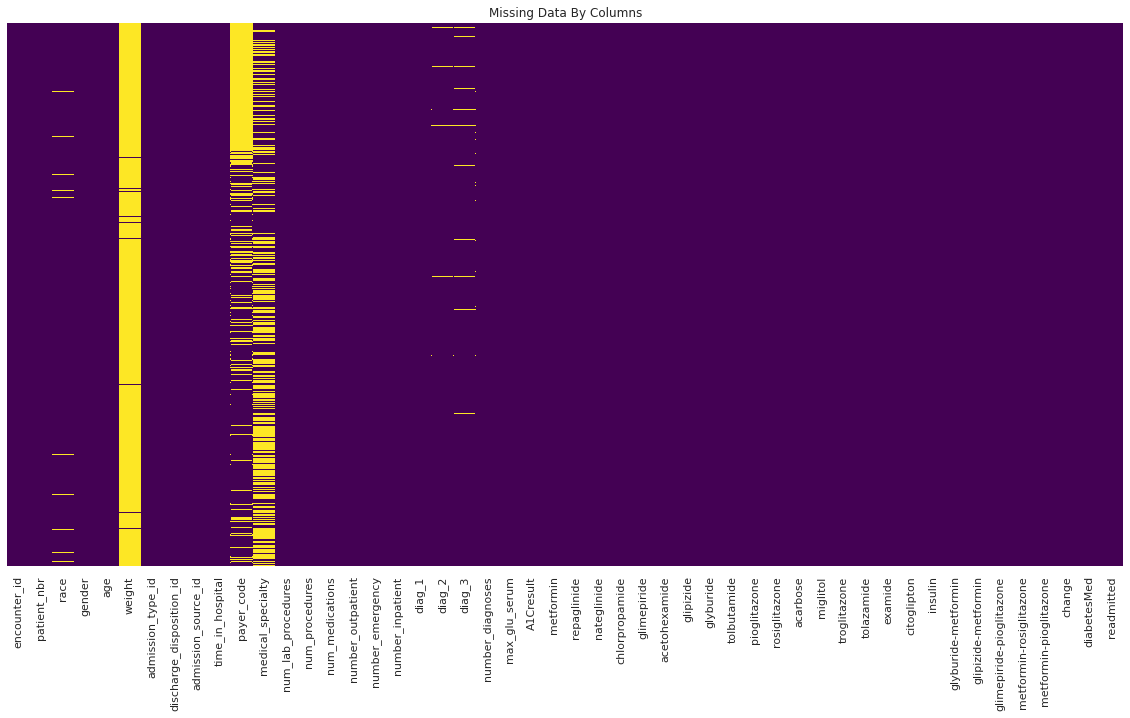

In [15]:
# Visualizing missing data 
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data By Columns')

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

In [16]:
#check of influesnce age on diabetes
#check by rows : df["age"].unique
#check by groups 
df["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


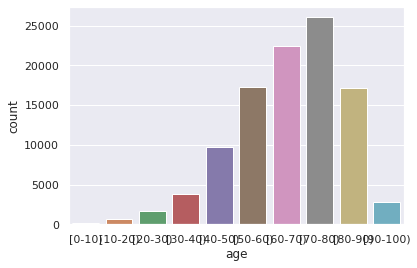

In [17]:
sns.countplot(df['age'])

**Observation:** the group of people sick with diabetes is mostly between 70-80 years old. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


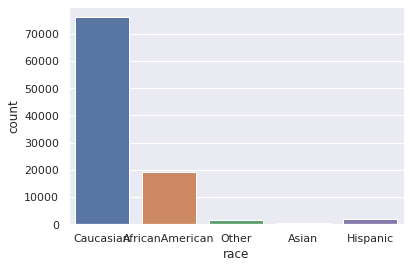

In [18]:
sns.countplot(df['race'])

**Obsravation:** Most of the people that sick with diabetes are caucasian (over 70,000) compare to other ethnic groups. 

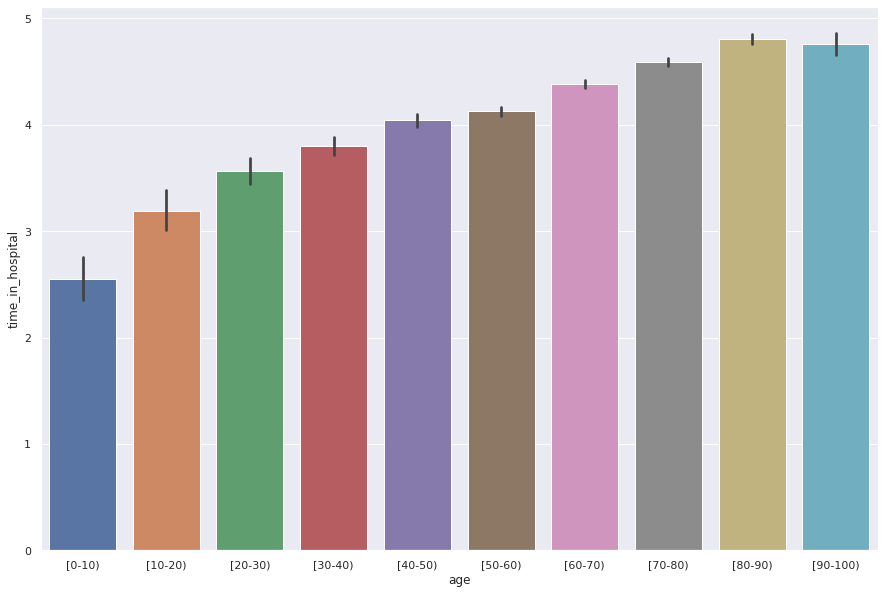

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='time_in_hospital',data=df)

**Observation:** The older person gets they spend longer in the hospital.

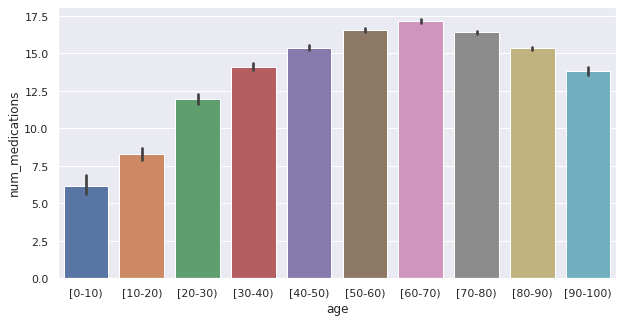

In [20]:
#plotting to see diffrences in age and number of medication they recieve
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='num_medications',data=df)

**Obesrvation:** The most medication recieves group of age between 60-70 years old. that also spend less time in hospital. 

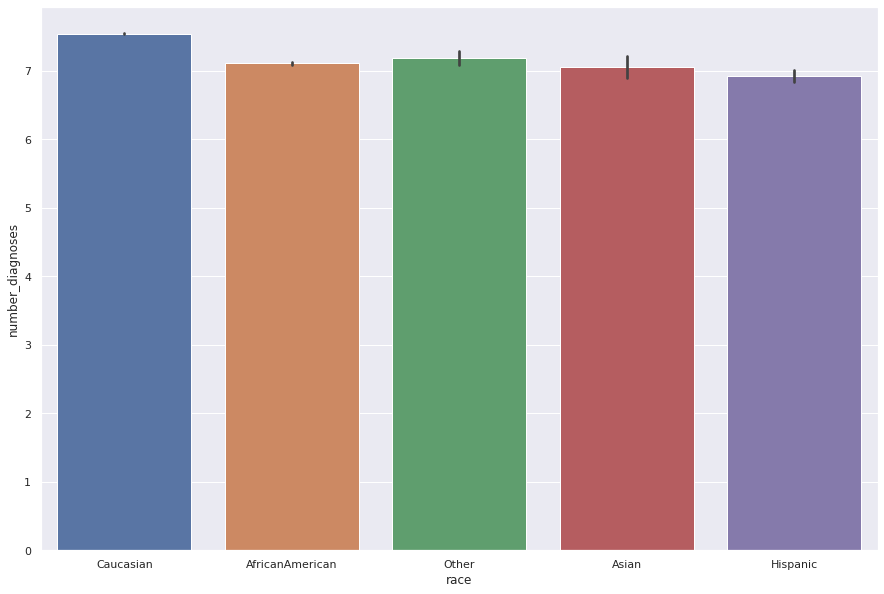

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='race',y='number_diagnoses',data=df)

**Observation:** number of diagnosis in the hospital are on Caucasian group but, what can explain that previously we saw with a group of the most sick with diabetes race group. 

In [22]:
#dropping columns we didnt use
df.drop(['encounter_id','weight','admission_type_id','discharge_disposition_id', 'time_in_hospital','payer_code','medical_specialty',
                     'number_inpatient','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','admission_source_id','num_lab_procedures','num_procedures',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True) 



In [23]:
#checking the results after we cleaned the columns 
df.head(20)

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,0,0,1,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),18,0,0,9,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),13,2,0,6,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),16,0,0,7,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),8,0,0,5,Steady,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),16,0,0,9,Steady,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),21,0,0,7,Steady,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),12,0,0,8,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),28,0,0,8,Steady,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),18,0,0,8,Steady,Ch,Yes,NO


In [24]:
#dropping duplicating data 
df.drop_duplicates(subset='patient_nbr', inplace=True)
df
#after we cleaned the data it became 71518 rows instead of 101766

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,0,0,1,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),18,0,0,9,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),13,2,0,6,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),16,0,0,7,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),8,0,0,5,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
101754,183087545,Caucasian,Female,[70-80),33,0,0,9,Steady,Ch,Yes,>30
101755,188574944,Other,Female,[40-50),26,0,1,9,Up,Ch,Yes,>30
101756,140199494,Other,Female,[60-70),17,1,1,9,Steady,No,Yes,>30
101758,120975314,Caucasian,Female,[80-90),22,0,1,9,Up,Ch,Yes,NO


**Data Modeling** 

In [ ]:
#to train and test the data we want to replace the columns with o and 1 

In [25]:
#we start from checking attributes to replace 
print(df["age"].unique())
print(df["race"].unique())
print(df["gender"].unique())
print(df["readmitted"].unique())
print(df["insulin"].unique())
print(df["diabetesMed"].unique())
print(df["change"].unique())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']
['NO' '>30' '<30']
['No' 'Up' 'Steady' 'Down']
['No' 'Yes']
['No' 'Ch']


In [26]:
df.race.replace({'Caucasian':1,'AfricanAmerican':2, 'Hispanic':3, 'Asian':4,'Other':5, np.nan:0},inplace=True)
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df.age.replace({ '[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':1, '[40-50)':1, '[50-60)':1, '[60-70)':2, '[70-80)':2, '[80-90)':2, '[90-100)':2}, inplace=True)
df.insulin.replace({'No':0,'Up':1,'Steady':2,'Down':3},inplace=True) 
df.diabetesMed.replace({'No':0,'Yes':1},inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

In [27]:
#Drop unknown gender, as there are only 3 of them
print(df[df['gender'] == 'Unknown/Invalid'])

       patient_nbr  race           gender  ...  change  diabetesMed  readmitted
30506    100695042     5  Unknown/Invalid  ...       1            1           0
75551     60524946     0  Unknown/Invalid  ...       0            0           0
82573     78119847     0  Unknown/Invalid  ...       1            1           0

[3 rows x 12 columns]


In [28]:
df = df[df['gender'] != 'Unknown/Invalid'].reset_index(drop=True)
df

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,1,0,0,1,0,0,1,0,0,0,0
1,55629189,1,0,0,18,0,0,9,1,1,1,0
2,86047875,2,0,0,13,2,0,6,0,0,1,0
3,82442376,1,1,1,16,0,0,7,1,1,1,0
4,42519267,1,1,1,8,0,0,5,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71510,183087545,1,0,2,33,0,0,9,2,1,1,0
71511,188574944,5,0,1,26,0,1,9,1,1,1,0
71512,140199494,5,0,2,17,1,1,9,2,0,1,0
71513,120975314,1,0,2,22,0,1,9,1,1,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


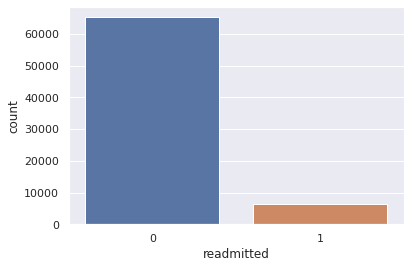

In [29]:
#checking how many patients readmitted (0) and how many didnt (1)
sns.countplot(df['readmitted'])

## Predictions and Evaluations

Training model will help us to answer to our main question: is patient readmitted in 30 days?

** Train and fit a logistic regression model on the training set.**

In [30]:
#Train and fit a logistic regression model on the training set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(df.drop('readmitted', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('readmitted',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
y = df['readmitted']
x = df.drop('readmitted', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**KNN classification:**

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9091798923302804


In [72]:
#testing how influenses data about race, gender, and age on deabitic group 
#using KNN accuracy
y = df['readmitted']
x = df[["race", "gender","age"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))


Accuracy for KNN: 0.9098091309515486


In [73]:
#create classification report for the model 
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13013
           1       0.00      0.00      0.00      1290

    accuracy                           0.91     14303
   macro avg       0.45      0.50      0.48     14303
weighted avg       0.83      0.91      0.87     14303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[13013     0]
 [ 1290     0]]


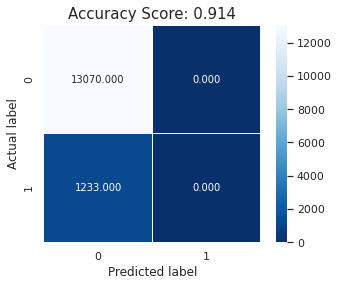

In [98]:
plt.figure(figsize=(5.5,4))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(knn.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

# Decision Tree classification 

Decision tree is a basic classification and regression method. Decision tree model has a tree structure, which can describe the process of classification instances based on features. It can be considered as a set of if-then rules, which also can be thought of as conditional probability distributions defined in feature space and class space.

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
#testing how big of a factor race, gender, and age affect on deabitic group 
#using decision tree accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, predict))

Accuracy for Decision Tree: 0.9118366776200797


In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[13042,     0],
       [ 1261,     0]])

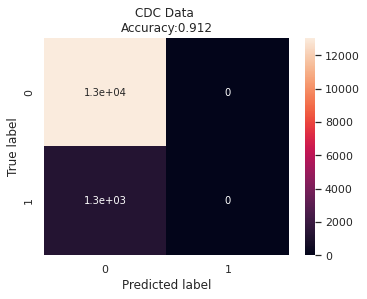

In [101]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('CDC Data \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Perform analysis on CDC data to answer questions such as: does the data show significant
evidence that certain demographic groups are more prone to diabetes? How and does
diabetes impact the length of stay in a hospital?

Conclusions: 
1. We can clearly see on the graphs using data we cleaned that Caucasian group has more cases of Diabetes than other etnic group (race plot).
2. Diabetes cases for age group between 80-90 years old. 
3. Using prediction of KNN classification we got accurancy of 0.914 if patient will be readmitted to the hospital. 
4. Using prediction of Decision Tree Classification we could predict accurancy of 0.912 that the patient will be readmitted. 